# AIFFEL 대전 1기 Fundamental 13 파이썬 어디까지 써봤니?!

## 학습목표
* 파이썬에 대해서 알아보자.
* 코드 재사용에 대해서 알아보자.
* 프로그래밍 패러다임에 대해서 알아보자.
* 파이썬 코드를 이쁘게 해보자.

## ❗퍼포먼스
### 어떤 언어든 코드를 짜서 실행을 시켰을 때 얼마나 빨리 처리가 되는가
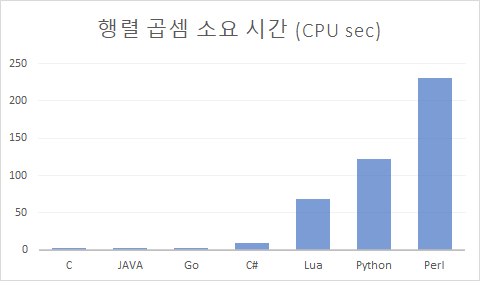
## ❗생산성
### 똑같은 기능을 하는 프로그램을 얼마나 빨리 작성할 수 있는가
## ❗ 퍼포먼스 vs 생산성
### 생산성과 퍼포먼스 간의 trade-off
### >>> 목적에 맞게, 상황에 맞게 언어를 선택

## ❗파이썬의 성능
### 1) 높은 생산성
### 2) 코드의 간결함
### 3) 빠른 개발 속도
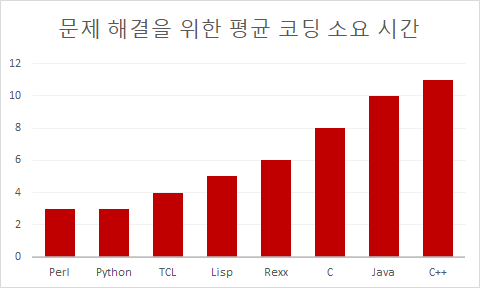
### . 같은 문제를 C++로 짜게 되면 평균 11시간 정도의 시간이 걸리고 파이썬으로 짜게 되면 약 3시간의 시간이 걸리는 걸 확인
### 4) 스크립트 언어
#### 스크립트 언어는 프로그래밍 언어의 한 종류로, 기존에 이미 존재하는 소프트웨어(애플리케이션)를 제어하기 위한 용도로 쓰이는 언어
일반적인 응용 소프트웨어는 컴파일러를 사용하는 언어에 의해 기계어로 번역된 채로 실행되기 때문에, 수정이 빈번하게 발생하면 수정 후 일일이 컴파일을 다시 해야 합니다. 덩치가 큰 프로그램은 컴파일 시간도 몇 시간 단위로 잡아먹는 일이 많은 데다, 일일이 컴파일을 다시 하는 것도 상당히 귀찮은 작업입니다.
이 때문에 수정이 빈번하게 발생하는 부분은 소스코드를 한줄 한줄 읽어 바로바로 실행하는 인터프리터 방식이 상당히 유리합니다. 스크립트 언어는 이런 부분에 사용하기 위해 나온 것으로, 응용 소프트웨어에서 스크립트 언어에 맞는 API를 제공, 응용 소프트웨어와 상호작용하면서 돌아가게 됩니다.

## ❗리스트 컴프리헨션(list Comprehension)
### 리스트 등 순회형 컨테이너 객체로부터 이를 가공한 새로운 리스트를 생성하는 아주 간결하고 편리한 방법

In [1]:
# 예시
my_list = ['a','b','c','d']

result_list = [(i, j) for i in range(2) for j in my_list]

print(result_list)

[(0, 'a'), (0, 'b'), (0, 'c'), (0, 'd'), (1, 'a'), (1, 'b'), (1, 'c'), (1, 'd')]


## ❗제너레이터(Generator)
### 머신러닝을 하면 매우 많은 데이터를 다루게 된다. 데이터는 1건만 존재하는 법은 없기 때문에 우리는 데이터를 처리하는 반복구조를 위해 for문을 떠올리게 될 것입니다. 위에서 살펴본 코드를 다시 한번 가져와 봅시다.

In [2]:
# 예시1
my_list = ['a','b','c','d']

# 인자로 받은 리스트를 가공해서 만든 데이터셋 리스트를 리턴하는 함수
def get_dataset_list(my_list):
    result_list = []
    for i in range(2):
        for j in my_list:
            result_list.append((i, j))
    print('>>  {} data loaded..'.format(len(result_list)))
    return result_list

for X, y in get_dataset_list(my_list):
    print(X, y)

>>  8 data loaded..
0 a
0 b
0 c
0 d
1 a
1 b
1 c
1 d


In [3]:
# 예시2
my_list = ['a','b','c','d']

# 인자로 받은 리스트로부터 데이터를 하나씩 가져오는 제너레이터를 리턴하는 함수
def get_dataset_generator(my_list):
    result_list = []
    for i in range(2):
        for j in my_list:
            yield (i, j)
            print('>>  1 data loaded..')

dataset_generator = get_dataset_generator(my_list)
for X, y in dataset_generator:
    print(X, y)

0 a
>>  1 data loaded..
0 b
>>  1 data loaded..
0 c
>>  1 data loaded..
0 d
>>  1 data loaded..
1 a
>>  1 data loaded..
1 b
>>  1 data loaded..
1 c
>>  1 data loaded..
1 d
>>  1 data loaded..


### 위 두 코드는 동일한 (X, y)를 출력하지만 데이터가 로드되는 시점에 차이가 있음을 보여줍니다. 위 코드만 봐서는 굳이 제너레이터가 왜 필요한지 이해할 수 없을지도 모릅니다. 하지만 만약 우리가 처리해야 할 데이터가 길이 4짜리 my_list가 아니라 1억 개의 레코드가 담겨 있는 빅데이터 파일이라면 어떨까요? 제너레이터가 없다면 우리는 길이 1억짜리 리스트를 리턴받아 메모리에 전부 올려놓고 처리를 시작해야 합니다. 그러나 제너레이터를 활용할 때는 1억 개의 데이터를 전부 메모리에 올려놓을 필요가 없이 현재 처리해야 할 데이터를 1개씩 로드해서 사용할 수 있게 됩니다. 이것은 빅데이터를 처리해야 할 머신러닝 상황에서 매우 요긴합니다.

## ❗Multiprocessing
### 컴퓨터가 작업을 처리하는 속도를 높여주는 방법 중 하나
### 아래의 이미지를 보면 parallel processing, serial processing이 있습니다. parallel processing은 병렬 처리로, serial processing은 순차 처리로 번역이 가능합니다. 우리가 지금까지 짠 코드는 순차 처리의 방식이었습니다. 즉, 4개의 자전거를 가용할 수 있으나 그중 1개의 자전거만 사용하고 있는 것과 같습니다. 그럼 어떻게 하면 놀고 있는 나머지 3개 자전거도 함께 사용할 수 있는지 알아보겠습니다.
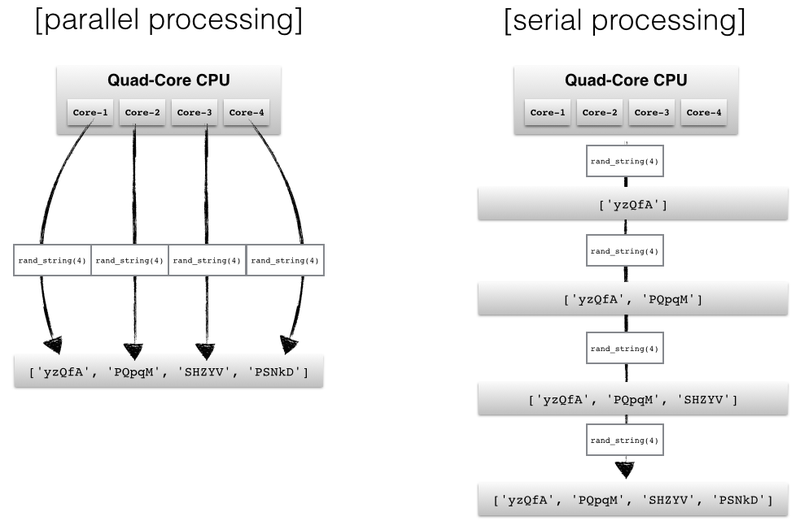

### 왼쪽 그림을 보시면 병렬 처리는 4개의 문자열이 동시에 처리가 되어 저장되는 것을 볼 수 있고, 순차 처리는 문자열이 하나씩 차례대로 처리되어 저장되는 것을 볼 수 있습니다.

In [4]:
# 순차처리 예시

import time

num_list = ['p1','p2', 'p3', 'p4']
start = time.time()

def count(name):
    for i in range(0, 100000000):
        a=1+2
        
    print("finish : ",name)

for num in num_list:
    count(num)

print("time :", time.time() - start)

finish :  p1
finish :  p2
finish :  p3
finish :  p4
time : 7.388176679611206


### finish로 나오는 문자는 p1, p2, p3, p4의 순서로, 원래의 리스트['p1', 'p2', 'p3', 'p4']의 순서가 동일합니다. 그리고 아래에 출력된, 총 걸린 시간을 기억해주세요!

### 다음은 병렬 처리를 이용한 코드입니다. 먼저 실행해보겠습니다.

In [5]:
# 병렬 처리 예시

import multiprocessing
import time

num_list = ['p1','p2', 'p3', 'p4']
start = time.time()

def count(name):
    for i in range(0, 100000000):
            a=1+2
    print("finish : ",name)
    

if __name__ == '__main__':
    pool = multiprocessing.Pool(processes = 4)
    pool.map(count, num_list)
    pool.close()
    pool.join()

print("time :", time.time() - start)

finish :  p1
finish :  p3
finish : finish :   p4p2

time : 2.025139570236206


### time이 순차 처리 보다 병렬 처리를 시행했을 때 2배 이상 빨라진 것을 확인
### 그럼 병렬 처리를 사용하는 방법에 대해 좀 더 자세히 알아보겠습니다. 일단, multiprocessing모듈을 import합니다. 그리고 병렬 처리를 하고 싶은 함수를 작성합니다. 그 아래에 count(name) 함수를 만들어보겠습니다.

In [6]:
# 멀티프로세싱 예시

import multiprocessing

def count(name):
    for i in range(0, 100000000):
            a=1+2
    print("finish : ",name)

### 아래에 이어서 if __name__ == '__main__': 이 나옵니다. 이것은 코드 시작점을 여기로 하라는 명령어입니다.

In [7]:
num_list = ['p1','p2', 'p3', 'p4']

if __name__ == '__main__':
    pool = multiprocessing.Pool(processes = 4)
    pool.map(count, num_list)
    pool.close()
    pool.join()

finish :  p4
finish :  p3
finish :  p2
finish :  p1


* pool = multiprocessing.Pool(processes = 4) : 병렬 처리 시, 4개의 프로세스를 사용하도록 합니다.
* pool.map(count, num_list) : 병렬화를 시키는 함수로써 count 함수에 num_list의 원소들을 하나씩 넣어 놓습니다. 여기서 num_list의 원소는 4개이므로 4개의 count 함수에 각각 하나씩 원소가 들어가게 됩니다.
* 즉, count('p1'), count('p2'), count('p3'), count('p4')가 만들어집니다.
* pool.close() : 일반적으로 병렬화 부분이 끝나면 나옵니다. 더이상 pool을 통해서 새로운 작업을 추가하지 않을 때 사용합니다.
* pool.join() : 프로세스가 종료될 때까지 대기하도록 지시하는 구문으로써 병렬처리 작업이 끝날 때까지 기다리도록 합니다.

## ❗함수
### 코드의 효율성을 높여줄 뿐만 아니라
### 코드의 재사용성을 높여줘 개발하는 시간이 적게 걸리게 되고
### 내가 뭘 하고자 하는지 모두가 알기 쉬워 코드의 가독성도 좋아집니다

## ❗함수 안의 함수 & 2개 이상의 return
### 여러분이 파이썬에서 열심히 함수를 생성하시다 보면 함수를 이용해서 return값(반환값)을 여러 개 받고 싶을 때가 있습니다. 예를 들어, 숫자들이 있는 list의 최댓값과 최솟값을 한꺼번에 출력하고 싶은데 각각 함수로 짜기에는 귀찮고 한 번에 받고 싶다고 생각해봅시다. 어떻게 하는지 먼저 보여 드리겠습니다. 바로 아래 코드를 돌려보죠!

In [8]:
list_data = [30, 20, 30, 40]

def minmax_function(x_list):
        
    def inner_min_function(x):
        length = len(x)
        min_result = x[0]
        for i in range(length):
            if min_result > x[i]:
                min_result = x[i]
        return min_result
    
    def inner_max_function(x):
        length = len(x)
        max_result = x[0]
        for i in range(length):
            if max_result < x[i]:
                max_result = x[i]
        return max_result
        
    x_min = inner_min_function(x_list)
    x_max = inner_max_function(x_list)
    
    minmax_list = [x_min, x_max]

    return minmax_list

print("최솟값, 최댓값은 : ", minmax_function(list_data))
print("최솟값은 : ", minmax_function(list_data)[0])
print("최댓값은 : ", minmax_function(list_data)[1])

최솟값, 최댓값은 :  [20, 40]
최솟값은 :  20
최댓값은 :  40


In [9]:
# 아래 코드는 실행 시 에러 발생

# print("최솟값, 최댓값은 : ", inner_min_function(list_data)) # 변경
# print("최솟값은 : ", minmax_function(list_data)[0])
# print("최댓값은 : ", minmax_function(list_data)[1])

# 함수 안에 함수를 만들 수는 있지만 안에 있는 함수는 가장 밖에 있는 def가 쳐놓은 울타리 안에서만 생활할 수 있는 것이죠!
# 그렇기 때문에 그 울타리 외부에서는 사용하지 못합니다.

## ❗여러 변수로 반환하기

In [10]:
list_data = [30, 20, 30, 40]

def minmax_function(x_list):
        
    def inner_min_function(x):
        length = len(x)
        min_result = x[0]
        for i in range(length):
            if min_result > x[i]:
                min_result = x[i]
        return min_result
    
    def inner_max_function(x):
        length = len(x)
        max_result = x[0]
        for i in range(length):
            if max_result < x[i]:
                max_result = x[i]
        return max_result
        
    x_min = inner_min_function(x_list)
    x_max = inner_max_function(x_list)
    
    return x_min, x_max

min_value, max_value = minmax_function(list_data)

print("최솟값은 : ", min_value)
print("최댓값은 : ", max_value)

최솟값은 :  20
최댓값은 :  40


## ❗람다 표현식
### 람다는 런타임에 생성해서 사용할 수 있는 익명 함수입니다. 쉽게 말하자면, 함수 이름이 없는 함수라고 생각하시면 됩니다. 람다 표현식은 식 형태로 되어 있어 람다 표현식(lambda expression)이라 부릅니다.

In [11]:
def add(x, y):
    return x + y

위와 같이 def를 사용해 일반적으로 함수를 만들려면 최소 2줄이 필요합니다. 함수 이름, 입력값들을 정의하는 첫 번째 줄, 결과를 반환하는 return 줄을 써야 하기 때문이죠. 하지만 우리는 이것을 한 줄로 줄일 수 있습니다!

In [12]:
def add(x, y): return x + y

짠! 사실 좋은 코드로 보이지는 않죠. 아래에서 유지보수가 쉬운 코드에 대한 이야기도 금방 나올 테니 일단은 봐주세요. 💪

다시 정신 차려서.. 우리는 지금 람다를 알아보려고 했었습니다. 일단 람다를 사용하는 법을 보여드리겠습니다.

In [13]:
print( (lambda x,y: x + y)(10, 20) )

30


먼저 lambda라고 적혀져 있고 그 옆에 위의 add 함수와 같은 역할을 하는 코드가 적혀져 있습니다. 순서대로 살펴보겠습니다.

    먼저 x, y 는 입력값을 의미합니다. 즉, x값과 y값이 입력으로 들어온다는 의미입니다.
    두 번째, x + y는 return 부분과 같습니다. add 함수에도 return x + y가 있었던 것과 같이 lambda 에도 ':' 이후에 반환값으로 나오게 됩니다.
    마지막은 (10, 20) 입니다. 각각 앞에 있던 x, y 입력값입니다. 만약 입력이 x, y, z 이라면 (10, 20, 30) 이렇게 세 개의 값을 넣게 됩니다. 보통 함수 안의 함수를 간단히 만들 때, def를 이용해 만들지 않고 람다를 이용해서 함수를 만들게 됩니다.

람다 표현식을 사용하는 가장 중요한 이유는 함수의 인수 부분을 간단히 하기 위함입니다. 이런 방식으로 사용하는 대표적인 예가 map()입니다.

람다 표현식을 사용하기 전에 먼저 def로 함수를 만들어서 map()을 사용하는 예제를 보여드리겠습니다.

map() 함수는 입력받은 자료형의 각 요소가 함수에 의해 수행된 결과를 묶어서 map iterator 객체로 출력하는 역할을 합니다. 무슨 말인지 좀 복잡하죠? 아래 예시를 보면서 이해해 보도록 하겠습니다. 먼저 코드를 돌려보겠습니다.

In [14]:
def list_mul(x):
     return x * 2

result = list(map(list_mul, [1, 2, 3]))
print(result)

#map_res = map(list_mul, [1, 2, 3])
#print(map_res)
#list_map_res = list(map_res)
#print(list_map_res)

[2, 4, 6]


코드를 먼저 설명하면, 함수 list_mul()은 숫자를 받은 뒤 그 두 배 값을 반환하는 함수입니다. 그리고 map()에 list_mul()함수와 리스트 [1, 2, 3]을 넣습니다. 주의할 점이 map()의 결과는 그냥 map 객체이므로 결과창에서 직접 눈으로 확인할 수 있는 형태로 바꾸기 위해 list()를 사용해 리스트 형태로 변환해 줍니다.

map(f, iterable) 는 입력으로 함수(f)와 반복 가능한(iterable) 객체(리스트, 튜플 등)를 받습니다. 코드에서 보시면 f에는 list_mul() 함수가 들어갔고 iterable에는 [1,2,3] 리스트가 들어가 있습니다. 코드를 수행하면 리스트에 들어가 있는 값들에 2를 곱한 결과가 나옵니다. 즉, 리스트안의 원소들을 1(0번째) 부터 시작해서 2(1번째), 3(2번째) 순서로 list_mul() 함수에 차례로 넣고 출력을 받아서 list 형태로 바꾼 것입니다.

그럼 이 map()이 lambda와 결합을 하면 어떻게 될까요?! 아래의 코드와 같이 list_mul() 함수를 lambda로 대체하면 총 3줄이었던 코드가 1줄로 줄어드는 매직을 보게 됩니다.

In [15]:
result = list(map(lambda i: i * 2 , [1, 2, 3]))
print(result)

[2, 4, 6]


map() 이외에도 filter(), reduce() 등 람다 표현식과 자주 쓰이는 함수가 많이 있습니다. 아래 사이트를 가시면 해당 함수에 대한 추가적인 설명이 있습니다 

## ❗모듈(Module)
### 모듈은 함수, 변수, 클래스를 모아 놓은 파일을 말합니다. 즉, 코드의 저장소라고 볼 수 있습니다. 모듈은 앞으로 우리가 자주 사용하게 될 중요한 기능 중 하나입니다. 이미 만들어져 있는 모듈을 가져와 쓸 수도 있고 아니면 우리가 직접 모듈을 만들어서 사용할 수도 있습니다.

### 모듈을 사용하는 방법을 알아보겠습니다. mycalculator.py 모듈을 만들었다고 가정해 봅시다. 해당 모듈은 사칙연산을 수행하는 코드로 구성되어 있습니다.

# mycalculator.py

test = "you can use this module."

def add(a, b):
   return a + b

def mul(a, b):
   return a * b

def sub(a, b):
    return a - b

def div(a, b):
    return a / b

class all_calc():
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def add(self):
   return self.a + self.b

    def mul(self):
       return self.a * self.b

    def sub(self):
        return self.a - self.b

    def div(self):
        return self.a / self.b

### 먼저 mycalculator를 import 합니다.

In [16]:
# import 모듈이름
# import mycalculator

### 그리고 mycalculator 안에 있는 함수들을 사용하고 싶으면 아래와 같이 사용하시면 됩니다.

In [17]:
# 모듈이름.함수이름()
# print(mycalculator.add(4, 2))

add() 함수의 내부를 짤 필요 없이 모듈만 import 하면 언제 어디서든 쉽게 사용할 수 있습니다.

모듈 이름이 mycalculator로 좀 긴 것 같습니다. 짧게 바꾸고 싶은데 어떻게 해야 할까요? as 구문을 사용하시면 모듈의 별명을 정할 수 있습니다. mycalculator 모듈을 mc라고 별명을 붙여보겠습니다.

In [18]:
# import mycalculator as mc

# 모듈이름.함수이름()
# print(mc.add(4, 2)) 

mycalculator가 mc라는 별명을 얻은 이후엔 mycalculator.add(4, 2) 대신 mc.add(4,2)만 적으면 실행됩니다.

## ❗패키지
파이썬 프로그래밍에 있어서 여러분들의 능력을 무한정으로 넓혀줄 수 있는 특급 비기를 알려드리겠습니다.

그것은 바로 패키지 입니다! 패키지(라이브러리)는 전 세계의 파이썬 사용자들이 만든 유용한 프로그램을 모아 놓은 보물 주머니 같은 것입니다. 패키지의 다른 말인 라이브러리는 말 그대로 도서관인데 실제 도서관과 비슷한 역할을 합니다. 도서관에는 수많은 책이 있고 거기서 원하는 책을 찾아야 합니다. 그러나 원하는 책을 찾기만 하면 내가 갖고 있는 문제나 궁금증을 해결 할 수 있겠죠?

파이썬에서 패키지는 여러 모듈을 하나로 모아둔 폴더라고 할 수 있습니다. 아래 그림을 보시면 종이처럼 보이는 부분이 함수이고, 그 함수 여러 개가 모여서 모듈을 만들고, 모듈이 여러 개 모여 패키지를 이룹니다.
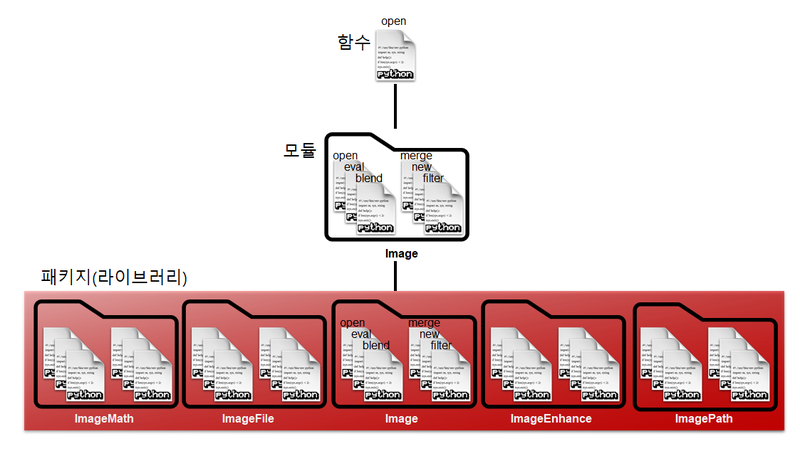

## ❗Whitespace
### 한 줄의 코드 길이가 79자 이하여야 합니다.

### 클래스에서 함수는 빈 줄 하나로 구분합니다.

In [19]:
class a():
    pass
# 빈 줄
# 빈 줄
class b():
        pass
# 빈 줄
# 빈 줄
def c():
        pass
# 빈 줄
# 빈 줄


### 클래스에서 함수는 빈 줄 하나로 구분합니다.

In [20]:
class a():

    def b():
        pass

    def c():
        pass

### 변수 할당 앞뒤에 스페이스를 하나만 사용합니다.

In [21]:
y = 1

### 리스트 인덱스, 함수 호출에는 스페이스를 사용하지 않습니다.

In [23]:
# my_list = [1, 2, 3]
# my_list[0] # 리스트 인덱스 호출

# my_function(0) # 함수 호출

### 쉼표(,), 쌍점(:), 쌍반점(;) 앞에서는 스페이스를 사용하지 않습니다.

In [24]:
# my_list[1, 2, 3]; my_list[0:1]
# if len(my_list) == 3: print my_list

### ❗이름 규칙

### 변수명 앞에 _(밑줄)이 붙으면 함수 등의 내부에서만 사용되는 변수를 일컫습니다.

In [25]:
_my_list = []

### 변수명 뒤에 _(밑줄)이 붙으면 라이브러리 혹은 파이썬 기본 키워드와의 충돌을 피하고 싶을 때 사용합니다.

In [26]:
import_ = "not_import"

### 소문자 L, 대문자 O, 대문자 I를 가능하면 사용하지 마세요. 특정 폰트에서는 가독성이 굉장히 안 좋습니다.
### 모듈(Module) 명은 짧은 소문자로 구성되며, 필요하다면 밑줄로 나눕니다.

### 클래스 명은 파스칼 케이스(PascalCase) 컨벤션으로 작성합니다. 네이밍 컨벤션은 뒤에서 다시 설명하겠습니다.

In [27]:
class MyClass():
    pass

### 함수명은 소문자로 구성하되 필요하면 밑줄로 나눕니다.

In [28]:
def my_function():
    pass

### 상수(Constant)는 모듈 단위에서만 정의하며 모두 대문자에 필요하다면 밑줄로 나눕니다.

In [29]:
 MY_PI = 3.14 # 상수는 변하지 않는 변수입니다.

###  ❗네이밍 컨벤션(Naming convention)

### snake_case
####  모든 공백을 "_"로 바꾸고 모든 단어는 소문자입니다.
#### 파이썬에서는 함수, 변수 등을 명명할 때 사용합니다.
#### ex) this_snake_case


### PascalCase
#### 모든 단어가 대문자로 시작합니다.
#### UpperCamelCase, CapWords라고 불리기도 합니다.
#### 파이썬에서는 클래스를 명명할 때 사용합니다.
#### ex) ThisPascalCase

### camelCase
#### 처음은 소문자로 시작하고 이후의 모든 단어의 첫 글자는 대문자로 합니다.
#### lowerCamelCase라고 불리기도 합니다.
#### 파이썬에서는 거의 사용하지 않습니다(java 등에서 사용)
#### ex) thisCamelCase